In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

(512, 512)


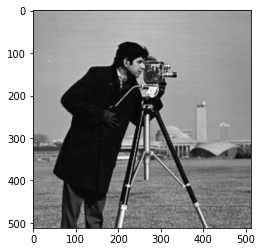

In [4]:
p=input("enter path of cover image")
cover=cv2.imread('images/'+p,0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


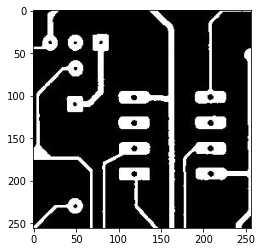

In [5]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

In [16]:
cover1d=cover.flatten()
msg1d=msg.flatten()
print(cover1d)
print(msg1d)

[159 159 159 ... 112 110 119]
[0 0 0 ... 0 0 8]


In [17]:
msg_bin=''
for i in msg1d:
    msg_bin+=format(int(i),'08b')
print(msg_bin)

0000000000000000000000000000000000000000000000000000000111111111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000001000000010000000000000000000000000000000000000010000000000000000000000000000111101111111111111101101111111111111011111101101000100000000000000001000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111111101111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011101101111011011111111100001000000000000000000000000000000000000

[[156 156 156 ... 152 152 152]
 [152 156 156 ... 155 151 151]
 [156 156 156 ... 152 148 148]
 ...
 [120 120 128 ... 124 116 104]
 [123 119 127 ... 128 116 104]
 [124 120 126 ... 112 110 116]]


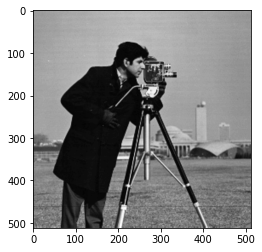

In [18]:
mbt=0
bits=2
for i in range(cover1d.shape[0]):
    bt=format(int(cover1d[i]),'08b')
    ad=msg_bin[mbt:mbt+bits]
    if ad=='':
        break
    bt=bt[:8-bits]+ad
    mbt+=bits
    cover1d[i]=int(bt,2)
cover_stego=cover1d.reshape(cover.shape)
print(cover_stego)
plt.imshow(cover_stego,cmap='gray')
plt.show()

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 247 255 ...   8   0   0]
 [247 255 255 ...   8   0   0]
 [255 255 247 ...   0   0   8]]


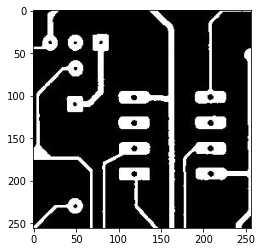

In [19]:
size=math.ceil((msg.shape[0]*msg.shape[1]*8)/bits)
msgl=[]
stego1d=cover_stego.flatten()
msg_bin=''
for i in stego1d:
    size-=1
    msg_bin+=format(int(i),'08b')[8-bits:]
    if len(msg_bin)>=8:
        msgl.append(int(msg_bin[:8],2))
        msg_bin=msg_bin[8:]
    if size==0:
        break
msg_dc=np.array(msgl,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
print(msg_dc)
plt.imshow(msg_dc,cmap='gray')
plt.show()

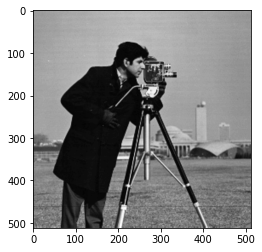

In [20]:
#########                       STEGANOGRAPHY ENCODING (WITHOUT SIZE ENCODING)                 ##########

def stego_encode_LSB(cover,msg,bits):
    if type(msg)==np.ndarray:
        msg_size=msg.shape[0]*msg.shape[1]*8
        msg1d=msg.flatten()
        typ='int'
    elif type(msg)==str:
        msg_size=len(msg)*8
        msg1d=msg
        typ='str'
    if (cover.shape[0]*cover.shape[1])<(msg_size/bits):
        print('message too large')
        return
    cover1d=cover.flatten()
    msg_bin=''
    for i in msg1d:
        if typ=='int':
            msg_bin+=format(int(i),'08b')
        elif typ=='str':
            msg_bin+=format(ord(i),'08b')
    mbt=0
    for i in range(cover1d.shape[0]):
        bt=format(int(cover1d[i]),'08b')
        ad=msg_bin[mbt:mbt+bits]
        if ad=='':
            break
        bt=bt[:8-bits]+ad
        mbt+=bits
        cover1d[i]=int(bt,2)
    cover_stego=cover1d.reshape(cover.shape)
    return cover_stego

cover_stego=stego_encode_LSB(cover,msg,2)
plt.imshow(cover_stego,cmap='gray')
plt.show()

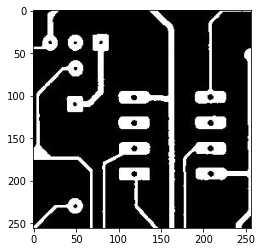

In [21]:
#########                       STEGANOGRAPHY DECODING (WITHOUT SIZE ENCODING)                 ##########

def stego_decode_LSB(stego,size,bits):
    size=math.ceil((size*8)/bits)
    msg=[]
    stego1d=stego.flatten()
    msg_bin=''
    for i in stego1d:
        size-=1
        msg_bin+=format(int(i),'08b')[8-bits:]
        if len(msg_bin)>=8:
            msg.append(int(msg_bin[:8],2))
            msg_bin=msg_bin[8:]
        if size==0:
            break
    return msg

msg_dec=stego_decode_LSB(cover_stego,msg.shape[0]*msg.shape[1],2)
msg_dec=np.array(msg_dec,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
plt.imshow(msg_dec,cmap='gray')
plt.show()

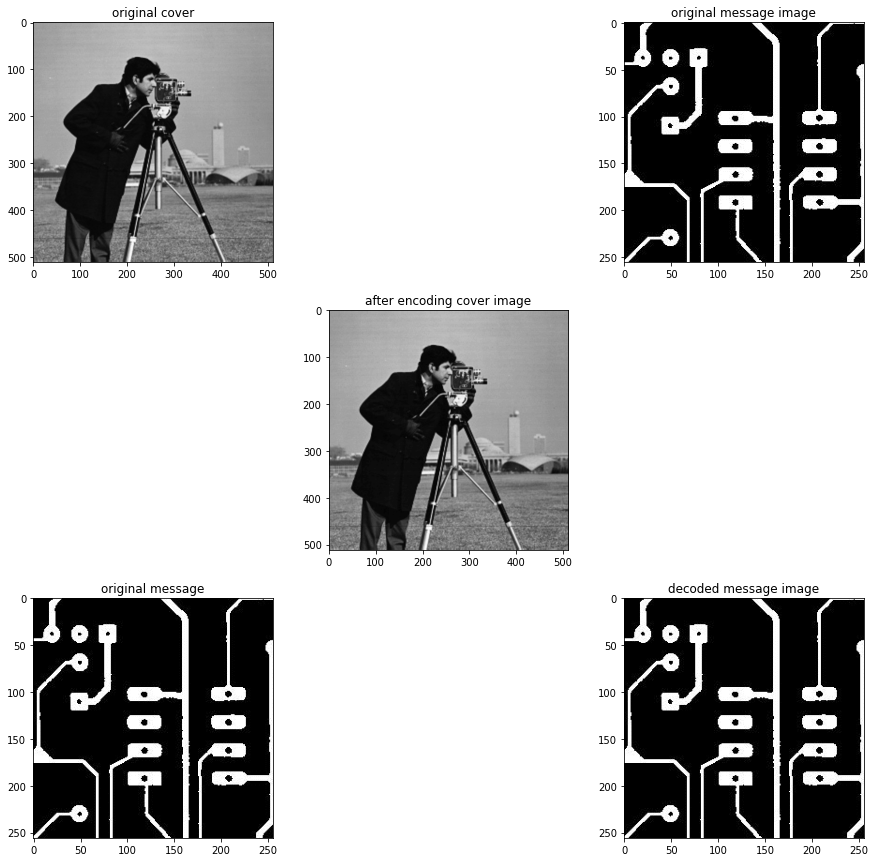

original cover image and stego image
-------------------------------------
MSE:  3.4306716918945312
PSNR:  42.77701201896776
SSIM:  0.9805313079801061

original message image and recovered message image
-----------------------------------------------------
MSE:  0.0
PSNR:  inf
SSIM:  1.0


In [22]:
from skimage import metrics

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('original cover')
plt.imshow(cover,cmap='gray')
plt.subplot(3,3,3)
plt.title('original message image')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,5)
plt.title('after encoding cover image')
plt.imshow(cover_stego,cmap='gray')
plt.subplot(3,3,7)
plt.title('original message')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,9)
plt.title('decoded message image')
plt.imshow(msg_dec,cmap='gray')
plt.show()
print('original cover image and stego image')
print('-------------------------------------')
print("MSE: ",metrics.mean_squared_error(cover,cover_stego))
print("PSNR: ",metrics.peak_signal_noise_ratio(cover,cover_stego))
print("SSIM: ",metrics.structural_similarity(cover,cover_stego))
print('\noriginal message image and recovered message image')
print('-----------------------------------------------------')
print("MSE: ",metrics.mean_squared_error(msg,msg_dec))
print("PSNR: ",metrics.peak_signal_noise_ratio(msg,msg_dec))
print("SSIM: ",metrics.structural_similarity(msg,msg_dec))

In [9]:
from dahuffman import HuffmanCodec

In [13]:
hist=[0 for i in range(256)]
for i in range(msg.shape[0]):
    for j in range(msg.shape[1]):
        hist[msg[i,j]]+=1
hist_dict={i : hist[i] for i in range(256)}
hf=HuffmanCodec.from_frequencies(hist_dict)
msg_list=list(msg.flatten())
#hf.print_code_table()
print(hf._table[72])
print('len',format(hf._table[72][0],'08b'))
print('code',format(hf._table[72][1],'0'+str(hf._table[72][0])+'b'))
print(hf._table)

(7, 25)
len 00000111
code 0011001
{100: (7, 0), 199: (10, 8), 211: (10, 9), 43: (9, 5), 88: (8, 3), 102: (7, 2), 76: (7, 3), 174: (10, 32), 198: (10, 33), 150: (9, 17), 233: (9, 18), 34: (11, 76), 216: (11, 77), 222: (10, 39), 103: (7, 5), 104: (7, 6), 106: (7, 7), 115: (6, 4), 71: (7, 10), 184: (7, 11), 105: (7, 12), 77: (7, 13), 177: (10, 112), 181: (10, 113), 45: (9, 57), 221: (10, 116), 213: (11, 234), 215: (11, 235), 144: (9, 59), 110: (7, 15), 92: (8, 32), 225: (9, 66), 47: (9, 67), 133: (7, 17), 62: (8, 36), 89: (8, 37), 75: (7, 19), 129: (6, 10), 87: (8, 44), 173: (10, 180), 37: (10, 181), 170: (10, 182), 237: (13, 1464), 29: (13, 1465), 25: (13, 1466), 28: (13, 1467), 33: (11, 367), 112: (7, 23), 111: (7, 24), 72: (7, 25), 90: (8, 52), 50: (9, 106), 145: (9, 107), 65: (8, 54), 64: (8, 55), 226: (9, 112), 168: (10, 226), 38: (10, 227), 91: (8, 57), 93: (8, 58), 195: (9, 118), 52: (9, 119), 116: (6, 15), 48: (9, 128), 197: (10, 258), 164: (10, 259), 94: (8, 65), 201: (10, 264), 

In [14]:

encode=hf.encode(msg_list)
print(len(encode))
print(msg_list[0])
a=format(encode[0],'08b')
print(a)
#####encoding

53437
72
00110010


In [15]:
byt_str=''
for i in range(len(encode)):
    byt_str+=format(encode[i],'08b')
print(byt_str)

1101100011011001010111001001100100111000011010110110111101000101001001001100100110101001010110001011001011011000110010001010001100101010010101001111000000001010010110000010100001010001001101010010101100101101100011001111000000001101010110011110111001001100100111000000000011011111110011110111000110111111100100101111011011111110111000110100011011110000001010010000011101111010011001001001101010010000011111101001111011101011001000011001010111000101000010100001101111111000101100111101001111011110110100111101111111010011111100001001111110111010100100000110001101000110111100000111101110101100000110100100110001101001001101010111010100001011110101011001011010000100101010110111110000000011011101010111011001010101010010110100000000100000001001011000000001010010000111000111000101001000010000111110010110101110101111111001010011000010011001101001010010000001010010110111011100101011101100001001100110100101001001011011100110010101110100010110111010110100101000101101001010001101001010111010010111111110

In [16]:
byt_list=[]
for i in range(0,len(byt_str),8):
    byt_list.append(int(byt_str[i:i+8],2))
print(bytes(byt_list))
print(type(hf.decode(bytes(byt_list))))

E\xdcx\xddB\x0b\xa8]\xc1=\xb0E\xdcz=\x04\x82\xc1!&\xe4\x84\x9e\xd3son\x90\xd8\xdbH)A]@\xd8\xc9\xbf\xb7HI\x04\x84\xe95\x16\xc4\x8a\x1e\xf4\xb2\xd8\x06\xa0W\x01*\xc4=!,\xbd\xd5\xee\xbc\x01\xfb\xdcJ\x06\xb6t@t\x00\x07\xe9\xca\xf5\xe5\xe4\x1a\xf4\x1c\x1fq\xa5\xbf\xa0\x18S\xd5q\xda\x94\xbc\xf2D\xe4\xe7z)\xc4y\xfc\xa7\xd6\xfeo\xb7;sE8\xac\x8a\xceb\xea\xf9DW\x15_\xd4\xebo\xb7RD|EQG\x9b}\xb5\x9c\xdf\xfa\x8f\xb9\xa7LH\xc9u\x10\x96m\xbaQ\x8cyN*9\x8b\x9f\xbc\xdb\xce\xdb\xef\xf7]sG>E\x1a+"\xa7g\x9du\xad\xd6\xe5\x15\xad\xda\x94\x8f\xc2\x08\x0f\xeaY,\x8e%\x90JI\xa9[\x05\x84\xabu\x06\xaaJ\xee<\xad\x82BU\xa7x\xf4\xb0\xef\x1e]\xd2`\x91\xe3zL\x13H\xbb\x86\xf6\x92j\r\xf4\x9aE\xdc&\x13\x05\xd4G\xa11\xedB\x82\xbc{Q\xa4\xd4\x12\x1b\xea \xba\x83u\x0fh\xad!"\x93{bOo\xb7\xdb\xa46WW\xb67\xf6\xde\x9b\x19\x1b\x0c\xa0l\xb2\xf4\xdcR\x81;H)\x0fI\r\xf8N\x08q\xcb\x01\x80\xbc\x01\xfati/.Jr\xbc\x14?\x10\xcf\xde\xe2\x03\x93\xaf\xdd^\xedP\xc39\xe3k\xbd\x97\x1f\x1c%\xbe$"\\\xf9g\xdb\xf9\xbf\xdfs\xd5\x91\x1fG\x96s\xbe\xdbI\

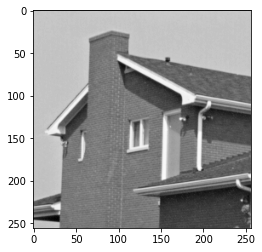

In [17]:
msg_huff_dec=np.array(hf.decode(bytes(byt_list)))
msg_huff_dec=msg_huff_dec.reshape(msg.shape[0],msg.shape[1])
plt.imshow(msg_huff_dec,cmap='gray')

In [18]:
from dahuffman import HuffmanCodec

original message size= 65536
compressed message length= 12233


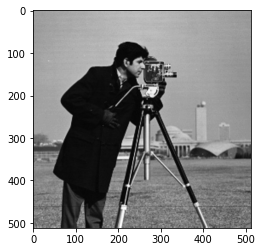

In [10]:
#########                     LSB steganography after used after huffman encoding               ########

def stego_lsb_huffman_encode(cover,msg,bits,printdetails=False):
    hist=[0 for i in range(256)]
    for i in range(msg.shape[0]):
        for j in range(msg.shape[1]):
            hist[msg[i,j]]+=1
    hist_dict={i : hist[i] for i in range(256) if hist[i]!=0}
    hf=HuffmanCodec.from_frequencies(hist_dict)
    #print(hf._table)
    msg_list=list(msg.flatten())
    encode=hf.encode(msg_list)
    cover1d=cover.flatten()
    #converting no of lsb bits to be modified
    byt_str=''
    cover1d[0]=cover1d[0] & 248
    cover1d[0]=cover1d[0] | bits
    #converting msg dimensions
    rowbits=int(math.log2(cover.shape[0])+1)
    colbits=int(math.log2(cover.shape[1])+1)
    byt_str+=format(msg.shape[0],'0'+str(rowbits)+'b')
    byt_str+=format(msg.shape[1],'0'+str(colbits)+'b')
    #print(rowbits,colbits)
    #converting table to bits
    #print(hf._table[hf._eof])
    byt_str+=format(hf._table[hf._eof][0],'08b')       #converting EOF
    byt_str+=format(hf._table[hf._eof][1],'0'+str(hf._table[hf._eof][0])+'b')
    for i in range(256):   
        if i in hf._table:                             #converting values
            byt_str+=format(hf._table[i][0],'08b')
            byt_str+=format(hf._table[i][1],'0'+str(hf._table[i][0])+'b')
        else:
            byt_str+=format(0,'08b')
    #converting huffman encoded data to bitstring
    n=len(encode)
    for i in range(n):
        byt_str+=format(encode[i],'08b')
    #print(len(byt_str)//8)
    if printdetails==True:
        print('original message size=',msg.shape[0]*msg.shape[1])
        print('compressed message length=',len(byt_str)//8)
    #embeding message into cover
    if (len(byt_str)/bits)+1>cover1d.shape[0]:
        print("message too large")
        return 
    mbt=0
    for i in range(1,cover1d.shape[0]):
        bt=format(int(cover1d[i]),'08b')
        ad=byt_str[mbt:mbt+bits]
        if ad=='':
            break
        bt=bt[:8-bits]+ad
        mbt+=bits
        cover1d[i]=int(bt,2)
    cover_stego=cover1d.reshape(cover.shape)
    return cover_stego
    
cover_stego_huff=stego_lsb_huffman_encode(cover,msg,2,True)
plt.imshow(cover_stego_huff,cmap='gray')
plt.show()

{0: (1, 1), 8: (3, 0), 16: (5, 4), 24: (7, 21), 33: (8, 41), 237: (6, 11), 247: (4, 3), 255: (2, 1), _EOF: (8, 40)}


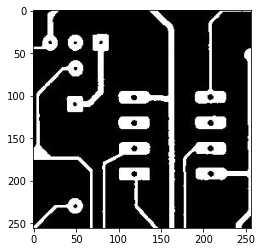

In [11]:
#########                     LSB steganography decoding after used after huffman encoding               ########
def stego_lsb_huffman_decode(stego):
    bits=int(stego[0,0] & 7)
    stego1d=stego.flatten()
    n=len(stego1d)
    byt_str=''
    for i in range(1,n):
        ad=format(int(stego1d[i]),'08b')
        byt_str+=ad[8-bits:]
    mtb=0
    rowbits=int(math.log2(stego.shape[0])+1)
    colbits=int(math.log2(stego.shape[1])+1)
    row=int(byt_str[mtb:mtb+rowbits],2)
    mtb+=rowbits
    col=int(byt_str[mtb:mtb+colbits],2)
    mtb+=colbits
    table=[]
    ln_eof=int(byt_str[mtb:mtb+8],2)
    mtb+=8
    code_eof=int(byt_str[mtb:mtb+ln_eof],2)
    mtb+=ln_eof
    for i in range(256):
        ln=int(byt_str[mtb:mtb+8],2)
        mtb+=8
        if ln!=0:
            code=int(byt_str[mtb:mtb+ln],2)
            mtb+=ln
            table.append((ln,code))
        else:
            table.append(0)
    table={i:table[i] for i in range(256) if table[i]!=0}
    htmp=HuffmanCodec.from_frequencies({0:4})
    table[htmp._eof]=(ln_eof,code_eof)
    print(table)
    hf=HuffmanCodec(table)
    n=len(byt_str)
    data_list=[]
    while mtb<n:
        ntb=mtb+8
        if ntb<=n:
            data_list.append(int(byt_str[mtb:ntb],2))
            mtb=ntb
        else:
            data_list.append(int(byt_str[mtb:n],2))
            break
    
    msg_huff_dec=hf.decode(bytes(data_list))
    msg_huff_dec=np.array(msg_huff_dec[:row*col])
    msg_huff_dec=msg_huff_dec.reshape(row,col)
    return msg_huff_dec
    

msg_dec_huff=stego_lsb_huffman_decode(cover_stego_huff)

plt.imshow(msg_dec_huff,cmap='gray')
plt.show()

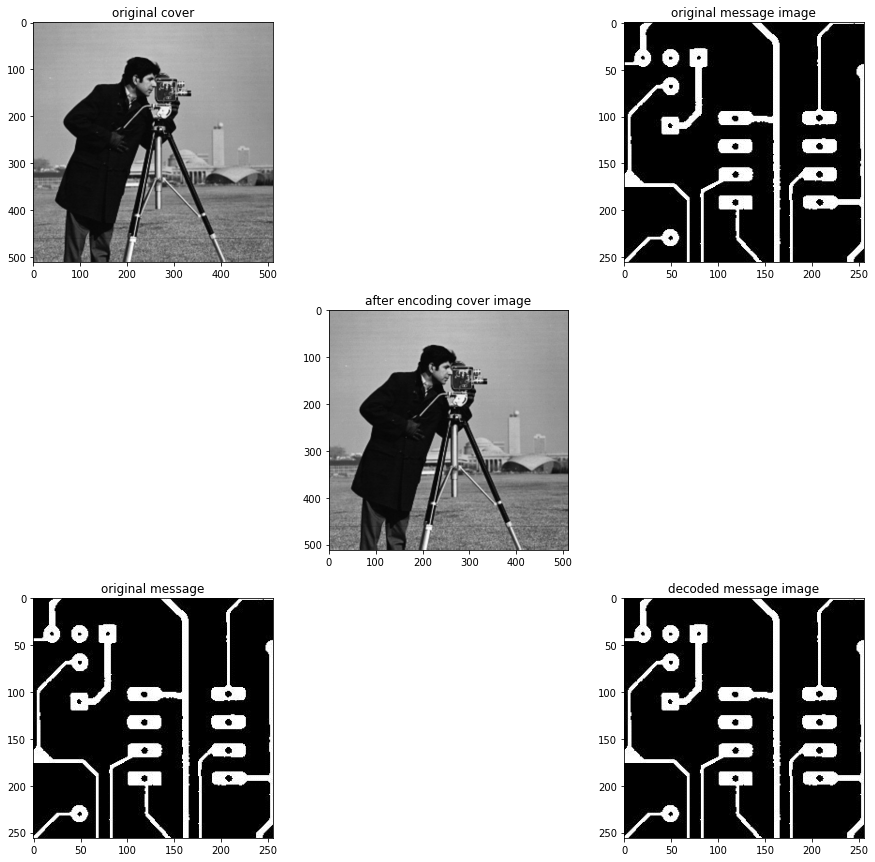

original cover image and stego image
-------------------------------------
MSE:  0.5245018005371094
PSNR:  50.93333377467049
SSIM:  0.9939431471430448

original message image and recovered message image
-----------------------------------------------------
MSE:  0.0
PSNR:  inf
SSIM:  1.0


In [12]:
from skimage import metrics

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('original cover')
plt.imshow(cover,cmap='gray')
plt.subplot(3,3,3)
plt.title('original message image')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,5)
plt.title('after encoding cover image')
plt.imshow(cover_stego_huff,cmap='gray')
plt.subplot(3,3,7)
plt.title('original message')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,9)
plt.title('decoded message image')
plt.imshow(msg_dec_huff,cmap='gray')
plt.show()
print('original cover image and stego image')
print('-------------------------------------')
print("MSE: ",metrics.mean_squared_error(cover,cover_stego_huff))
print("PSNR: ",metrics.peak_signal_noise_ratio(cover,cover_stego_huff))
print("SSIM: ",metrics.structural_similarity(cover,cover_stego_huff))
print('\noriginal message image and recovered message image')
print('-----------------------------------------------------')
print("MSE: ",metrics.mean_squared_error(msg,msg_dec_huff))
print("PSNR: ",metrics.peak_signal_noise_ratio(msg,msg_dec_huff))
print("SSIM: ",metrics.structural_similarity(msg,msg_dec_huff))